In [1]:
#pip install tweepy 
import tweepy
import json 
import datetime
import pandas as pd

consumer_key = 'oZcrXuDrM0KNVDfArQFNwby2d'  # Add your API key here
consumer_secret = 'DozYv9vePrLL4ad7FS76MV8ysjrKe4xciVWtmf6RGxinrX9isr'  # Add your API secret key here
access_token = '1367011455132962816-Lf2tDsjH8Nu43GzalzMT44UVy261d9'
access_token_secret = 'GNCgxreKW5QenTpz4vlsTpPxSEoLOPeLjBUX5EOPmuEOc'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

Note: you may need to restart the kernel to use updated packages.


In [3]:
# public_tweets = api.home_timeline()
# for tweet in public_tweets:
#     print(tweet.text)

# Get the User object for twitter...
#user = api.get_user('Greenpeace')
#Models contain the data and some helper methods which we can then use:

# print(user.screen_name) #user name  
# print(user.followers_count) # how many followers  

users = ['@GretaThunberg', '@Greenpeace']

df_accounts = pd.DataFrame([status.author.screen_name, status.full_text, status.created_at]
for user in users for status in tweepy.Cursor(api.user_timeline, screen_name=users, tweet_mode="extended").items(100))

df_accounts

#df_accounts.columns = ["user_account","text","created_at"]



#dir(status)


# for friend in user.friends():
#    print(friend.screen_name)

""


In [ ]:
#!pip install textblob


In [ ]:
#!pip install wordcloud

In [ ]:
#!pip install langdetect

In [ ]:
#nltk.download('vader_lexicon')

In [29]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [331]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#query = 'ClimateChange OR FridaysForFuture'
query = 'ClimateChange OR FridaysForFuture OR ClimateEmergency OR ClimateStrike OR TheParisAgreement OR GlobalWarming'
#keyword = input(“Please enter keyword or hashtag to search: “)
noOfTweet = 500
tweets = tweepy.Cursor(api.search, q=query).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
        
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [318]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  166
negative number:  150
neutral number:  184


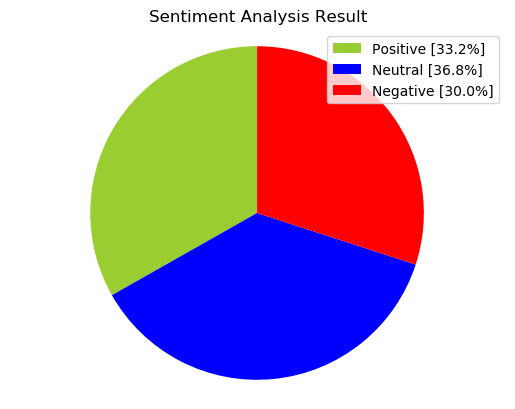

In [319]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result" )
plt.axis('equal')
plt.show()

In [320]:
tweet_list.drop_duplicates(inplace = True)

In [321]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub('[^A-Za-z0-9]+',' ',x)
#rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @DavidFopp: ""The Swedish politicians have t...",the swedish politicians have to stop pretendi...
1,RT @vjack: Covid-19 paused climate emissions –...,covid 19 paused climate emissions but they re...
2,"RT @WMO: ""A gloomy threshold.""\n2021 is expect...",a gloomy threshold 2021 is expected to be the...
3,"RT @IPBES: 🌊🇪🇸 The green, underwater meadows o...",the green underwater meadows of posidonia sea...
4,"RT @AaravSeth_: ""Why are you so afraid of hear...",why are you so afraid of hearing the truth va...
5,Climate crisis: recent European droughts 'wors...,climate crisis recent european droughts worst ...
6,"RT @PaulEDawson: ""We've upset the energy balan...",we ve upset the energy balance of the entire ...
7,Boot oder Fahrrad? Entscheide selbst:\nAuf htt...,boot oder fahrrad entscheide selbst auf https ...
8,Breaking #ClimateChange News: New invasive spe...,breaking climatechange news new invasive speci...
9,RT @allan_crawshaw: GLOBAL CLIMATE STRIKE #Fri...,global climate strike fridaysforfuture march ...


In [322]:
#!pip install vaderSentiment

In [329]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(row)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']

tw_list['neg'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['neg'])
tw_list['neu'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['neu'])
tw_list['pos'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['pos'])
tw_list['compound'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

tw_list.head(10)


,0,text,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,"RT @DavidFopp: ""The Swedish politicians have t...",the swedish politicians have to stop pretendi...,0.400000,0.600000,0.278,0.661,0.062,-0.7096,NaN
1,RT @vjack: Covid-19 paused climate emissions –...,covid 19 paused climate emissions but they re...,0.000000,0.000000,0.000,1.000,0.000,0.0000,NaN
2,"RT @WMO: ""A gloomy threshold.""\n2021 is expect...",a gloomy threshold 2021 is expected to be the...,0.162500,0.333333,0.068,0.932,0.000,-0.1531,NaN
3,"RT @IPBES: 🌊🇪🇸 The green, underwater meadows o...",the green underwater meadows of posidonia sea...,0.200000,0.600000,0.000,0.853,0.147,0.4754,NaN
4,"RT @AaravSeth_: ""Why are you so afraid of hear...",why are you so afraid of hearing the truth va...,-0.600000,0.900000,0.000,0.867,0.133,0.3182,NaN
5,Climate crisis: recent European droughts 'wors...,climate crisis recent european droughts worst ...,-0.333333,0.416667,0.353,0.647,0.000,-0.8481,NaN
6,"RT @PaulEDawson: ""We've upset the energy balan...",we ve upset the energy balance of the entire ...,-0.200000,0.512500,0.230,0.685,0.085,-0.5574,NaN
7,Boot oder Fahrrad? Entscheide selbst:\nAuf htt...,boot oder fahrrad entscheide selbst auf https ...,0.000000,0.000000,0.000,1.000,0.000,0.0000,NaN
8,Breaking #ClimateChange News: New invasive spe...,breaking climatechange news new invasive speci...,0.136364,0.454545,0.000,1.000,0.000,0.0000,NaN
9,RT @allan_crawshaw: GLOBAL CLIMATE STRIKE #Fri...,global climate strike fridaysforfuture march ...,0.033333,0.033333,0.086,0.914,0.000,-0.1280,NaN


In [326]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["neg"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"] 
tw_list_neutral = tw_list[tw_list["sentiment"]== 1]

KeyError: 'sentiment'

In [325]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

KeyError: 'sentiment'

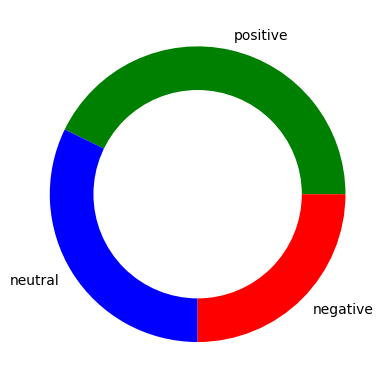

In [316]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size= pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
# extracting hashtags 

query = 'ClimateChange OR FridaysForFuture OR ClimateEmergency OR ClimateStrike OR ParisAgreement OR GlobalWarming'

df = pd.DataFrame(
    [tweet.author.screen_name, tweet.text] for tweet in tweepy.Cursor(api.search, q=query).items(500)
)
df

In [ ]:
for i, tweet in enumerate(tweepy.Cursor(api.search, q=query).items(10)):
    print(i, tweet.author.screen_name, tweet.text, tweet.created_at)

dir(tweet)

In [ ]:
class TweetMiner(object):

    result_limit    =   20    
    data            =   []
    api             =   False
    
    twitter_keys = {
        'consumer_key':        'oZcrXuDrM0KNVDfArQFNwby2d',
        'consumer_secret':     'DozYv9vePrLL4ad7FS76MV8ysjrKe4xciVWtmf6RGxinrX9isr',
        'access_token_key':    '1367011455132962816-Lf2tDsjH8Nu43GzalzMT44UVy261d9',
        'access_token_secret': 'GNCgxreKW5QenTpz4vlsTpPxSEoLOPeLjBUX5EOPmuEOc'
    }
    
    
    def __init__(self, keys_dict=twitter_keys, api=api, result_limit = 20):
        
        self.twitter_keys = keys_dict
        
        auth = tweepy.OAuthHandler(keys_dict['consumer_key'], keys_dict['consumer_secret'])
        auth.set_access_token(keys_dict['access_token_key'], keys_dict['access_token_secret'])
        
        self.api = tweepy.API(auth)
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="gretathunberg", #BECAUSE WHO ELSE!
                         mine_rewteets=False,
                         max_pages=5):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                     count=self.result_limit,
                                                     max_id=last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                     include_retweets=True
                                                    )        
            else:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                        count=self.result_limit,
                                                        tweet_mode = 'extended',
                                                        include_retweets=True)
                
            for item in statuses:

                mined = {
                    'tweet_id':        item.id,
                    'name':            item.user.name,
                    'screen_name':     item.user.screen_name,
                    'retweet_count':   item.retweet_count,
                    'text':            item.full_text,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at,
                    'favourite_count': item.favorite_count,
                    'hashtags':        item.entities['hashtags'],
                    'status_count':    item.user.statuses_count,
                    'location':        item.place,
                    'source_device':   item.source
                }
                
                try:
                    mined['retweet_text'] = item.retweeted_status.full_text
                except:
                    mined['retweet_text'] = 'None'
                try:
                    mined['quote_text'] = item.quoted_status.full_text
                    mined['quote_screen_name'] = status.quoted_status.user.screen_name
                except:
                    mined['quote_text'] = 'None'
                    mined['quote_screen_name'] = 'None'
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data 

In [ ]:
miner=TweetMiner(result_limit = 200 )

In [ ]:
mined_tweets = miner.mine_user_tweets(user='gretathunberg', max_pages=17)

mined_tweets_df= pd.DataFrame(mined_tweets)
mined_tweets_df.head()



In [ ]:
mined_tweets_df.to_csv('greta_thunberg_tweets.csv')

In [ ]:
import time

handle_list= ['list of handles you want the timelines of']

twitter_dict={}
counter=0

for name in handle_list:
    try:
      twitter_dict[name]=[]
      twitter_dict[name].append(miner.mine_user_tweets(user=name, max_pages=17))
      counter = counter +1
      if counter%40==0:
        time.sleep(900) #15 minute sleep time
    #if name invalid print name and remove key
    except:
      print(name, 'is invalid or locked')
      twitter_dict.pop(name)
    
all_tweets=pd.concat([pd.DataFrame(twitter_dict[i][0]) for i in twitter_dict])



In [ ]:
# Python Script to Extract tweets of a 
# particular Hashtag using Tweepy and Pandas 


# import modules 
import pandas as pd 
import tweepy 


# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
	print() 
	print(f"Tweet {n}:") 
	print(f"Username:{ith_tweet[0]}") 
	print(f"Description:{ith_tweet[1]}") 
	print(f"Location:{ith_tweet[2]}") 
	print(f"Following Count:{ith_tweet[3]}") 
	print(f"Follower Count:{ith_tweet[4]}") 
	print(f"Total Tweets:{ith_tweet[5]}") 
	print(f"Retweet Count:{ith_tweet[6]}") 
	print(f"Tweet Text:{ith_tweet[7]}") 
	print(f"Hashtags Used:{ith_tweet[8]}") 


# function to perform data extraction 
def scrape(words, date_since, numtweet): 
	
	# Creating DataFrame using pandas 
	db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
							'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
	
# 	# We are using .Cursor() to search through twitter for the required tweets. 
# 	# The number of tweets can be restricted using .items(number of tweets) 
# 	tweets = tweepy.Cursor(api.search, q=words, lang="en", 
# 						since=date_since, tweet_mode='extended').items(numtweet) 

    
	# We are using .Cursor() to search through twitter for the required tweets. 
	# The number of tweets can be restricted using .items(number of tweets) 
	tweets = tweepy.Cursor(api.search, q=words, lang="en", 
						since=date_since, tweet_mode='extended').items(numtweet)     
	# .Cursor() returns an iterable object. Each item in 
	# the iterator has various attributes that you can access to 
	# get information about each tweet 
	list_tweets = [tweet for tweet in tweets] 
	
	# Counter to maintain Tweet Count 
	i = 1
	
	# we will iterate over each tweet in the list for extracting information about each tweet 
	for tweet in list_tweets: 
		username = tweet.user.screen_name 
		description = tweet.user.description 
		location = tweet.user.location 
		following = tweet.user.friends_count 
		followers = tweet.user.followers_count 
		totaltweets = tweet.user.statuses_count 
		retweetcount = tweet.retweet_count 
		hashtags = tweet.entities['hashtags'] 
		
		# Retweets can be distinguished by a retweeted_status attribute, 
		# in case it is an invalid reference, except block will be executed 
		try: 
			text = tweet.retweeted_status.full_text 
		except AttributeError: 
			text = tweet.full_text 
		hashtext = list() 
		for j in range(0, len(hashtags)): 
			hashtext.append(hashtags[j]['text']) 
		
		# Here we are appending all the extracted information in the DataFrame 
		ith_tweet = [username, description, location, following, 
					followers, totaltweets, retweetcount, text, hashtext] 
		db.loc[len(db)] = ith_tweet 
		
		# Function call to print tweet data on screen 
		printtweetdata(i, ith_tweet) 
		i = i+1
	filename = 'scraped_tweets.csv'
	
	# we will save our database as a CSV file. 
	db.to_csv(filename) 


if __name__ == '__main__': 
	
	# Enter your own credentials obtained 
	# from your developer account 
# 	consumer_key = "XXXXXXXXXXXXXXXXXXXXX"
# 	consumer_secret = "XXXXXXXXXXXXXXXXXXXXX"
# 	access_key = "XXXXXXXXXXXXXXXXXXXXX"
# 	access_secret = "XXXXXXXXXXXXXXXXXXXXX"
	consumer_key = 'oZcrXuDrM0KNVDfArQFNwby2d'  # Add your API key here
	consumer_secret = 'DozYv9vePrLL4ad7FS76MV8ysjrKe4xciVWtmf6RGxinrX9isr'  # Add your API secret key here
	access_key = '1367011455132962816-Lf2tDsjH8Nu43GzalzMT44UVy261d9'
	access_secret = 'GNCgxreKW5QenTpz4vlsTpPxSEoLOPeLjBUX5EOPmuEOc'
	auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
	auth.set_access_token(access_key, access_secret) 
	api = tweepy.API(auth) 
	
	# Enter Hashtag and initial date 
	print("Enter Twitter HashTag to search for") 
	words = input() 
	print("Enter Date since The Tweets are required in yyyy-mm--dd") 
	date_since = input() 
	
	# number of tweets you want to extract in one run 
	numtweet = 1500
	scrape(words, date_since, numtweet) 
	print('Scraping has completed!') 
    #ClimateChange OR #FridaysForFuture OR #ClimateEmergency OR #ClimateStrike OR #TheParisAgreement OR #GlobalWarming


In [221]:
# trends for Switzerland 

# WOEID of Switzerland 
woeid = 23424957
  
# fetching the trends 
trends = api.trends_place(id = woeid) 
  
# printing the information 
print("The top trends for the location are :") 
  
for value in trends: 
    for trend in value['trends']: 
        print(trend['name']) 


The top trends for the location are :
#Cardano
Worst Anime
Paare
Russia
Best Anime
Last Anime
Maskenpflicht
Sarah
#agrarreform
#sicheröffnen
#coronavirus
#parlCH
Ausland
Monaten
COVID-19
Armee
Switch
Tatsache
Turquie
Gründe
Florida
Schulen
Texas
Parlament
Verständnis
Swiss
Bill Gates
Teams
Termin
Johnson
Japan
Jean
Switzerland
Italy
Christian
Grenze
Germany
Variante
valais
Conseil
Europe
Fake News
Bauern
Medikamente
Canada
Exact
Humor
Risikogruppen
Vorteil
Zoom


In [ ]:
query = 'ClimateChange OR FridaysForFuture OR ClimateEmergency OR ClimateStrike OR TheParisAgreement OR GlobalWarming'

noOfTweet = 300

In [3]:
tw_list = pd.DataFrame(
    [tweet.author.screen_name, tweet.text] for tweet in tweepy.Cursor(api.search, q=query, lang='en').items(noOfTweet)
)

In [4]:
tw_list.columns = ["user_account","text"]
tw_list.head()

,user_account,text
0,LaurentGhekiere,RT @GabrielMariya: Today @EUCouncil approved #...
1,wegeochem,RT @nilsmoosdorf: Important study shows that c...
2,WideUpIndia,Use School Management System to Solve More Use...
3,vrosauer,RT @WorldBank: Concentrated #solar power (CSP)...
4,durham_magazine,County Durham School Taking Part In World Reco...


In [5]:
tw_list['text'] = tw_list['text'].str.lower()\
.str.replace('(@[a-z0-9]+)\w+',' ')\
.str.replace('(http\S+)', ' ')\
.str.replace('([^0-9a-z \t])',' ')\
.str.replace(' +',' ')\
.str.replace('(&gt)', '')\
.str.replace('(\xa0)', '')\
.str.replace('(&amp)', '')\
.str.replace('(&lt)', '')\
.str.replace('(<a).*(>).*(</a>)', '')\
.str.replace("(<br/>)", "")\
.str.replace("(rt)", "")

tw_list.head(n=10)

,user_account,text
0,LaurentGhekiere,today approved horizoneu 95 5 bn will be avai...
1,wegeochem,impoant study shows that coastal groundwater ...
2,WideUpIndia,use school management system to solve more use...
3,vrosauer,concentrated solar power csp plants can provi...
4,durham_magazine,county durham school taking pa in world record...
5,meiklwagner,singularity jon hopkins 2018 domino records o...
6,ESA_EO,next monday on worldwaterday join us and resea...
7,senkadam,ocean heatwaves caused by globalwarming are w...
8,hub_change,thank you for covering our recent study on th...
9,DJHbutterflies,my commentary on an unappreciated role of bee...


In [6]:
tw_list.drop_duplicates(inplace=True)

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(row)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']

tw_list['neg'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['neg'])
tw_list['neu'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['neu'])
tw_list['pos'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['pos'])
tw_list['compound'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

tw_list.head(10)

,user_account,text,polarity,subjectivity,neg,neu,pos,compound
0,LaurentGhekiere,today approved horizoneu 95 5 bn will be avai...,0.400,0.400,0.128,0.591,0.281,0.4767
1,wegeochem,impoant study shows that coastal groundwater ...,0.000,0.000,0.000,1.000,0.000,0.0000
2,WideUpIndia,use school management system to solve more use...,0.450,0.650,0.000,0.531,0.469,0.8885
3,vrosauer,concentrated solar power csp plants can provi...,0.000,0.000,0.000,0.890,0.110,0.2732
4,durham_magazine,county durham school taking pa in world record...,0.000,0.000,0.000,0.885,0.115,0.0772
5,meiklwagner,singularity jon hopkins 2018 domino records o...,0.000,0.000,0.000,1.000,0.000,0.0000
6,ESA_EO,next monday on worldwaterday join us and resea...,0.000,0.000,0.000,0.872,0.128,0.2960
7,senkadam,ocean heatwaves caused by globalwarming are w...,0.000,0.000,0.302,0.698,0.000,-0.8316
8,hub_change,thank you for covering our recent study on th...,0.000,0.250,0.000,0.848,0.152,0.3612
9,DJHbutterflies,my commentary on an unappreciated role of bee...,-0.125,0.375,0.238,0.762,0.000,-0.6486


In [12]:
from nltk.corpus import stopwords

In [13]:
#nltk.download('stopwords')

In [14]:
additional  = ['rt','rts','retweet'] #we'll store additional stopwords here
swords = set().union(stopwords.words('english'),additional)

In [15]:
tw_list.drop_duplicates(subset='text',inplace=True)

In [16]:
tw_list['text'] = tw_list['text'].str.lower()\
.str.replace('(@[a-z0-9]+)\w+',' ')\
.str.replace('(http\S+)', ' ')\
.str.replace('([^0-9a-z \t])',' ')\
.str.replace(' +',' ')\
.str.replace('(&gt)', '')\
.str.replace('(\xa0)', '')\
.str.replace('(&amp)', '')\
.str.replace('(&lt)', '')\
.str.replace('(<a).*(>).*(</a>)', '')\
.str.replace("(<br/>)", "")\
.apply(lambda x: [i for i in x.split() if not i in swords])
#  ReviewText = ReviewText.str.replace("(<br/>)", "")
#     ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
#     ReviewText = ReviewText.str.replace('(&amp)', '')
#     ReviewText = ReviewText.str.replace('(&gt)', '')
#     ReviewText = ReviewText.str.replace('(&lt)', '')
#     ReviewText = ReviewText.str.replace('(\xa0)', ' ')  

In [17]:
tw_list.head(n=20) 

,user_account,text,polarity,subjectivity,neg,neu,pos,compound
0,LaurentGhekiere,"[today, approved, horizoneu, 95, 5, bn, availa...",0.400000,0.400000,0.128,0.591,0.281,0.4767
1,wegeochem,"[impoant, study, shows, coastal, groundwater, ...",0.000000,0.000000,0.000,1.000,0.000,0.0000
2,WideUpIndia,"[use, school, management, system, solve, uses,...",0.450000,0.650000,0.000,0.531,0.469,0.8885
3,vrosauer,"[concentrated, solar, power, csp, plants, prov...",0.000000,0.000000,0.000,0.890,0.110,0.2732
4,durham_magazine,"[county, durham, school, taking, pa, world, re...",0.000000,0.000000,0.000,0.885,0.115,0.0772
5,meiklwagner,"[singularity, jon, hopkins, 2018, domino, reco...",0.000000,0.000000,0.000,1.000,0.000,0.0000
6,ESA_EO,"[next, monday, worldwaterday, join, us, resear...",0.000000,0.000000,0.000,0.872,0.128,0.2960
7,senkadam,"[ocean, heatwaves, caused, globalwarming, wipi...",0.000000,0.000000,0.302,0.698,0.000,-0.8316
8,hub_change,"[thank, covering, recent, study, effects, clim...",0.000000,0.250000,0.000,0.848,0.152,0.3612
9,DJHbutterflies,"[commentary, unappreciated, role, bees, pollin...",-0.125000,0.375000,0.238,0.762,0.000,-0.6486


In [18]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [19]:
tw_list['stemmed'] = tw_list['text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [20]:
import nltk.sentiment.vader as vd
from nltk import download
#download('vader_lexicon')

In [21]:
sia = vd.SentimentIntensityAnalyzer()

In [22]:
from nltk.tokenize import word_tokenize

In [23]:
#nltk.download('punkt')

In [24]:
tw_list['sentiment_score'] = tw_list['text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

In [25]:
tw_list[['text','sentiment_score']].head(n=10)

,text,sentiment_score
0,"[today, approved, horizoneu, 95, 5, bn, availa...",0.4801
1,"[impoant, study, shows, coastal, groundwater, ...",0.0000
2,"[use, school, management, system, solve, uses,...",1.7007
3,"[concentrated, solar, power, csp, plants, prov...",0.2732
4,"[county, durham, school, taking, pa, world, re...",0.0772
5,"[singularity, jon, hopkins, 2018, domino, reco...",0.0000
6,"[next, monday, worldwaterday, join, us, resear...",0.2960
7,"[ocean, heatwaves, caused, globalwarming, wipi...",-1.1988
8,"[thank, covering, recent, study, effects, clim...",0.3612
9,"[commentary, unappreciated, role, bees, pollin...",-0.7837


In [26]:
tw_list['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 0    148
 1     40
-1     14
 2      1
Name: sentiment_score, dtype: int64

In [27]:
tw_list[tw_list['sentiment_score'] > 1]

,user_account,text,polarity,subjectivity,neg,neu,pos,compound,stemmed,sentiment_score
2,WideUpIndia,"[use, school, management, system, solve, uses,...",0.450000,0.650000,0.0,0.531,0.469,0.8885,"[use, school, manag, system, solv, use, paper,...",1.7007
132,SDGsCoLab,"[celebrate, water, day, water, racida, securit...",0.000000,0.000000,0.0,0.556,0.444,0.8625,"[celebr, water, day, water, racida, secur, com...",1.4542
146,BeMoreSquirrel,"[loving, graffiti, grangetown, highlight, impa...",0.600000,0.950000,0.0,0.545,0.455,0.8481,"[love, graffiti, grangetown, highlight, impact...",1.3798
151,RACIDAofficial,"[celebrate, water, day, water, racida, securit...",0.000000,0.000000,0.0,0.534,0.466,0.8625,"[celebr, water, day, water, racida, secur, com...",1.4542
158,farhadtoor,"[scientists, say, super, plant, could, help, s...",0.216667,0.483333,0.0,0.621,0.379,0.8087,"[scientist, say, super, plant, could, help, so...",1.0013
162,barbvee,"[angel, owen, says, climatechange, impacting, ...",0.500000,0.500000,0.0,0.673,0.327,0.7430,"[angel, owen, say, climatechang, impact, abori...",1.0202
165,OCEANS21_ORG,"[groundbreaking, global, study, first, map, oc...",0.227778,0.355556,0.0,0.596,0.404,0.8176,"[groundbreak, global, studi, first, map, ocean...",1.3178
174,waleedchangwani,"[help, us, spread, word, awesome, position, fo...",1.000000,1.000000,0.0,0.692,0.308,0.8213,"[help, us, spread, word, awesom, posit, folx, ...",1.0268


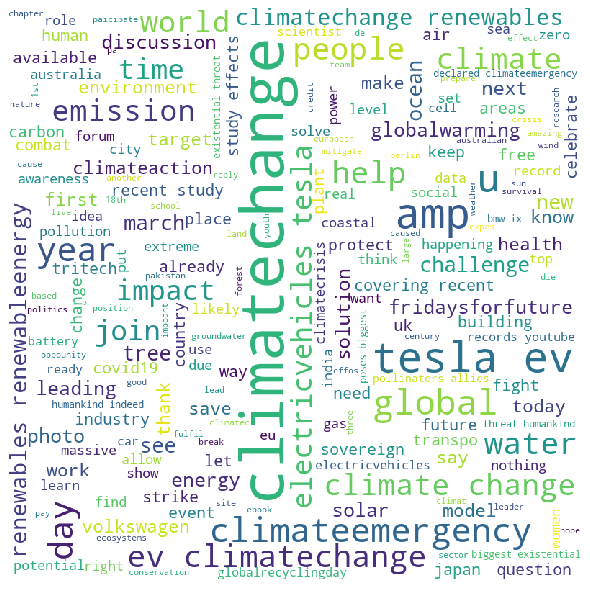

In [33]:
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in tw_list["text"]: 
      
    # typecaste each val to string 
    val = str(val) 
    #print(val)
  
    # split the value 
    tokens = val.split() 
    
    #print(tokens[1])
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].replace("'",'').lower() 
        
    
    comment_words += " ".join(tokens)+" "
    

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 